## Лабораторная работа №5. Решение задач классификации с помощью байесовского классификатора и метода k-ближайших соседей.
### Часть 3. Метрический алгоритм k-ближайших соседей.

Используемый набор данных: [Iris](https://archive.ics.uci.edu/ml/datasets/Iris)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import os
import requests

%matplotlib inline

pd.options.display.max_columns = None

In [2]:
def downloadFile(url, filePath):
    if not os.path.exists(filePath):
        req = requests.get(url)
        f = open(filePath, "wb")
        f.write(req.content)
        f.close

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris"
downloadFile(url + "/iris.data", "dataset/iris.data")
downloadFile(url + "/iris.names", "dataset/iris.names")

In [3]:
headers = ["Sepal length", "Sepal width", "Petal length", "Petal width", "Class"]
data = pd.read_csv("dataset/iris.data", names=headers)
data = data.astype({"Class": "category"})
data.sample(40)

,Sepal length,Sepal width,Petal length,Petal width,Class
64,5.6,2.9,3.6,1.3,Iris-versicolor
1,4.9,3.0,1.4,0.2,Iris-setosa
122,7.7,2.8,6.7,2.0,Iris-virginica
62,6.0,2.2,4.0,1.0,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor
118,7.7,2.6,6.9,2.3,Iris-virginica
30,4.8,3.1,1.6,0.2,Iris-setosa
52,6.9,3.1,4.9,1.5,Iris-versicolor
137,6.4,3.1,5.5,1.8,Iris-virginica
73,6.1,2.8,4.7,1.2,Iris-versicolor


In [4]:
display(data.describe())
display(data.isna().sum())

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
Class           0
dtype: int64

Пропусков в данных нет.

Подготовим данные для классификации: выберем признаки и метки и сформируем тренировочные и тестовые наборы.

In [5]:
classes = data["Class"].unique()
y = label_binarize(data["Class"], classes=classes)
X = data.drop(columns=["Class"]).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

Создадим классификатор, обучим его, а затем выполним классификацию.

In [6]:
y_score = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3)).fit(X_train, y_train).predict(X_test)

Оценим получившуюся классификацию.

In [7]:
print(classification_report(y_test, y_score))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.75      0.86         4
           2       0.94      1.00      0.97        16

   micro avg       0.97      0.97      0.97        30
   macro avg       0.98      0.92      0.94        30
weighted avg       0.97      0.97      0.96        30
 samples avg       0.97      0.97      0.97        30



In [8]:
def drawROCCurve(y_test, y_score, neighbors):
    n_classes = len(classes)
    fpr, tpr, auc = dict(), dict(), dict()
    for i in range(n_classes):
        y_test_cl = y_test[:,i]
        y_score_cl = y_score[:,i]
        fpr[i], tpr[i], _ = roc_curve(y_test_cl, y_score_cl)
        auc[i] = roc_auc_score(y_test_cl, y_score_cl)

    lw = 2
    colors = ['aqua', 'darkorange', 'cornflowerblue']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC of class {0} (AUC = {1:0.2f})'.format(i, auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC for KNN, neighbors={neighbors}')
    plt.legend(loc="lower right")
    plt.show()

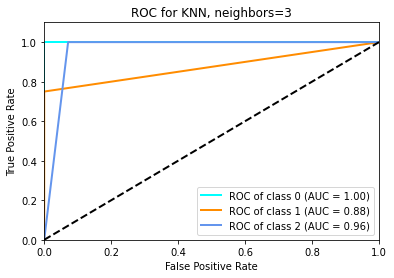

In [9]:
drawROCCurve(y_test, y_score, neighbors=3)

Подберем оптимальное количество соседей.

In [10]:
params = {'n_neighbors': np.arange(1, 25)}
gscv = GridSearchCV(KNeighborsClassifier(), params)
gscv.fit(X, y)
gscv.best_params_

{'n_neighbors': 1}

Обучим и оценим модель с оптимальным количеством соседей.

In [11]:
optimal_neighbors = gscv.best_params_["n_neighbors"]
y_score = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=optimal_neighbors)).fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_score))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.75      0.86         4
           2       0.94      1.00      0.97        16

   micro avg       0.97      0.97      0.97        30
   macro avg       0.98      0.92      0.94        30
weighted avg       0.97      0.97      0.96        30
 samples avg       0.97      0.97      0.97        30



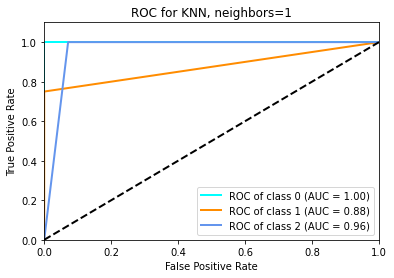

In [12]:
drawROCCurve(y_test, y_score, neighbors=optimal_neighbors)

Попробуем различные значения параметра k.

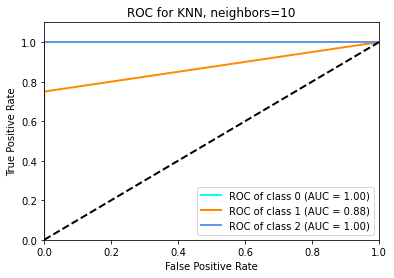

In [13]:
k = 10
y_score = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=k)).fit(X_train, y_train).predict(X_test)
drawROCCurve(y_test, y_score, neighbors=k)

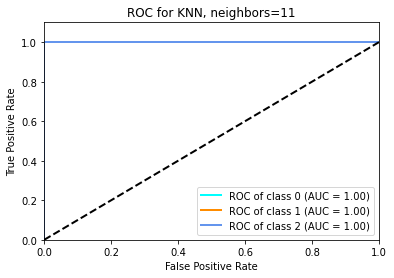

In [14]:
k = 11
y_score = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=k)).fit(X_train, y_train).predict(X_test)
drawROCCurve(y_test, y_score, neighbors=k)